# Support Vector Machines
in SVMs our optimization objective is to maximize the margin. The margin is defined as the distance between the separating hyperplane (decision boundary) and the training samples that are closest to this hyperplane, which are the so-called support vectors.

*Note: We can think the first 2 function as the linear seperator of the 2 class in a hyper plane. The finally in the last equation we reach to objective function (right side) whih we can optimise to find the weight parameters*

\begin{align}
    w_0 + \it{w}^{T}x_{pos} = 1 \\
    w_0 + \it{w}^{T}x_{neg} = -1 \\
    \it{w^t}(x_{pos}-x_{neg}) = 2 \\
    \dfrac{\it{w^t}(x_{pos}-x_{neg})}{||\it{w}||} = \dfrac{2}{||\it{w}||}
\end{align}

*Note: For non-linear case we can introduce a slack variable for compensation also known as soft margin classifier by Vladimir Vapnik in 1995.*

\begin{align}
    w_0 + \it{w}^{T}x_{pos} = 1 - \zeta^{(i)} \ if \ y^{(i)}=1 \\
    w_0 + \it{w}^{T}x_{pos} = -1 + \zeta^{(i)} \ if \ y^{(i)}=-1
\end{align}

### Regular Import

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [29]:
# Plot setting
plt.style.use('bmh')
plt.rcParams["font.size"] = "20"

### Data Load & Exploration

In [30]:
from sklearn import datasets

In [31]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Coass labels: ', np.unique(y))

Coass labels:  [0 1 2]


### Preprocession

In [7]:
print("Feature Matrix : \n", X[:3])
print("Target Column Vector : \n", y[:3])

Feature Matrix : 
 [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]]
Target Column Vector : 
 [0 0 0]


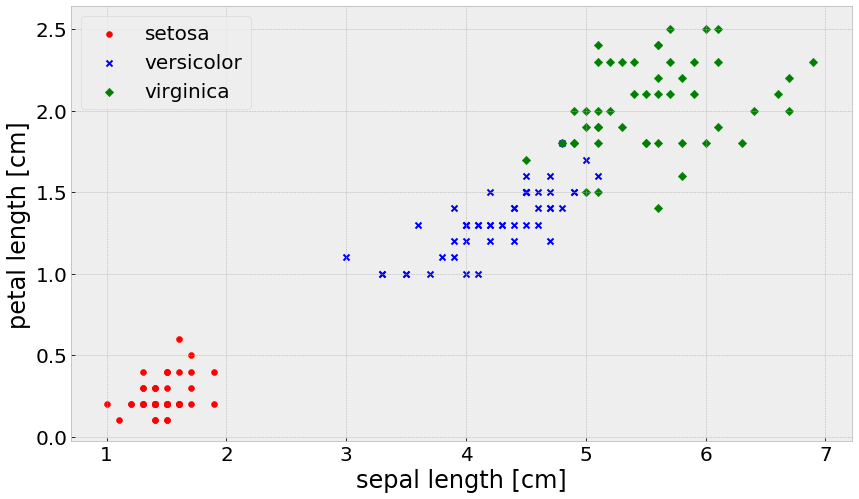

In [32]:
plt.figure(figsize=(14,8))
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label = 'versicolor')
plt.scatter(X[100:, 0], X[100:, 1], color='green', marker='D', label = 'virginica')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [36]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Training A Linear Model

In [38]:
from sklearn.svm import SVC

In [39]:
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

### Evaluating The Model

### Checking The Disission Boundry

In [40]:
from neuralbase import plot_decision_regions_combined

In [41]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

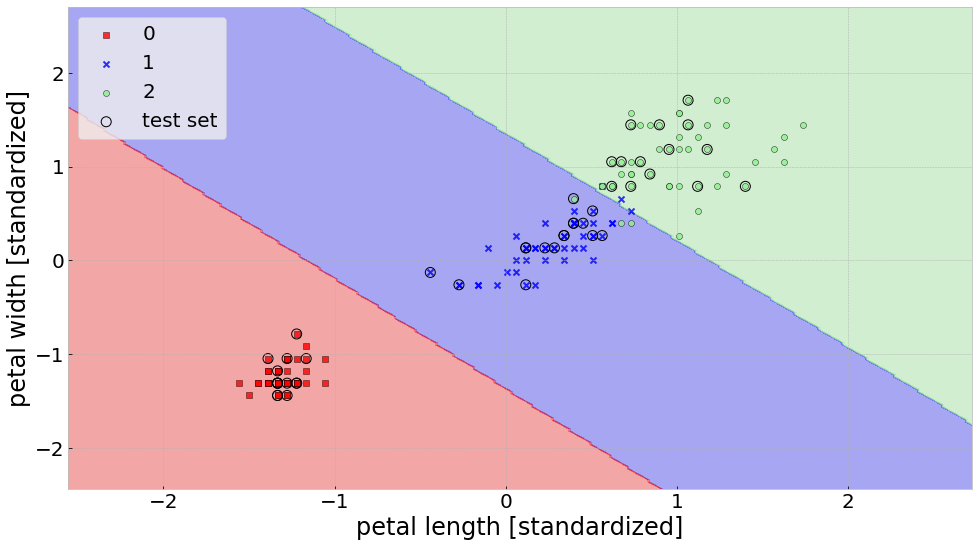

In [42]:
plt.figure(figsize=(14, 8))
plot_decision_regions_combined(
    features=X_combined_std, targets=y_combined, 
    classifier=svm, test_idx=range(105, 150)
)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

*Note: Result Shows the SVM Applcation was able to seperate the multiclass region successfully*

### Non Linear Fit using Kernel Trick

One of the most widely used kernels is the Radial Basis Function (RBF) kernel or simply called the Gaussian kernel.

\begin{align}
        \kappa(x^{(i)}, x^{(j)}) = exp(-\dfrac{||x^{(i)} - x^{(j)}||^{2}}{2\sigma^{2}}) \\
        \kappa(x^{(i)}, x^{(j)}) = exp(-\gamma(||x^{(i)} - x^{(j)}||^{2})
\end{align}

*Here $\gamma$ is the free parameter to be optimized*

In [45]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

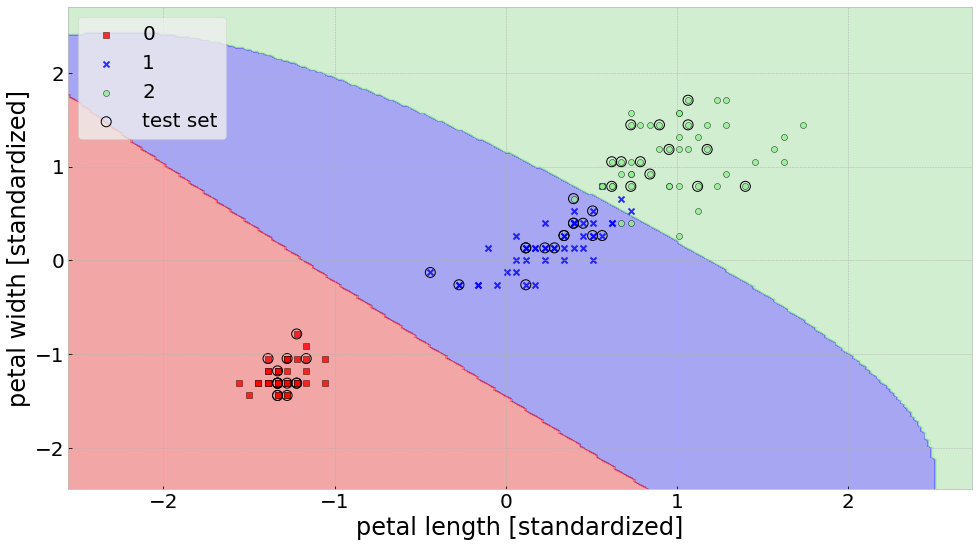

In [44]:
plt.figure(figsize=(14, 8))
plot_decision_regions_combined(
    features=X_combined_std, targets=y_combined, 
    classifier=svm, test_idx=range(105, 150)
)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

Now, let us increase the value of $\gamma$ and observe the effect on the decision boundary

In [47]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

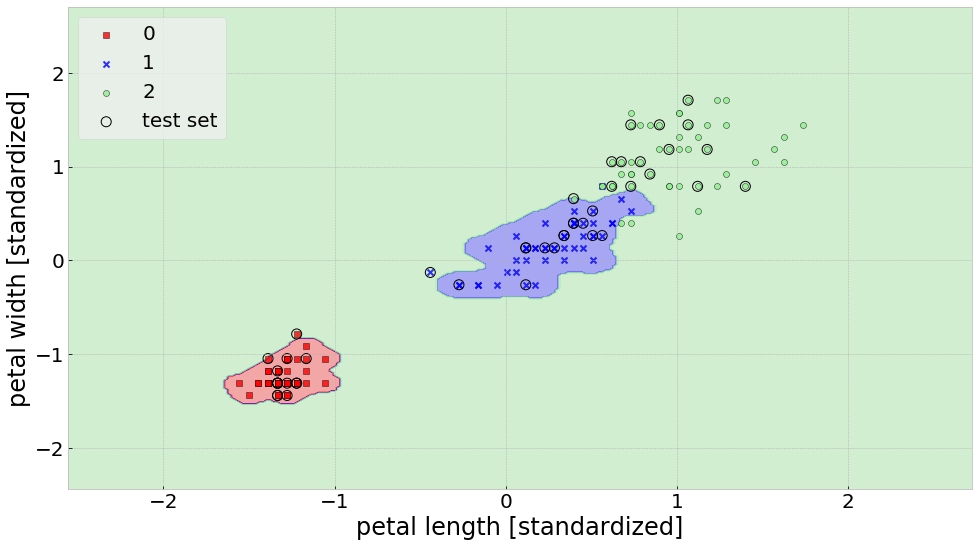

In [48]:
plt.figure(figsize=(14, 8))
plot_decision_regions_combined(
    features=X_combined_std, targets=y_combined, 
    classifier=svm, test_idx=range(105, 150)
)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

*Note: I looks like with larger $\gamma$ the model is way overfitted with very high variance*

### Referances

[1] [Python Machine Learning](https://sebastianraschka.com/books.html)